# Імпорт даних

In [1]:
import numpy as np
import pandas as pd

In [4]:
flats = pd.read_csv("flats.csv", delimiter = ',', decimal = ',', dtype={
                    'Місто': str,
                    'Кімнат': int,
                    'Загальна_площа': float,
                    'Ціна': float
                    })


Зчитав дані з файлу, при цьому встановив типи для колонок, розділювач для колонок ',' і розділювач для чисел з плаваючою комою ','.

In [8]:
flats.head()

,Місто,Кімнат,Загальна_площа,Ціна
0,Вінниця,3,120.0,1875000.0
1,Вінниця,3,66.0,975000.0
2,Вінниця,2,66.0,1375000.0
3,Вінниця,2,44.0,637500.0
4,Вінниця,3,63.0,835000.0


### Виведу інформацію про датафрейм:

In [6]:
print(flats.shape)

(839, 4)


In [7]:
print(flats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 4 columns):
Місто             839 non-null object
Кімнат            839 non-null int32
Загальна_площа    839 non-null float64
Ціна              839 non-null float64
dtypes: float64(2), int32(1), object(1)
memory usage: 23.0+ KB
None


Бачимо, що в датафреймі є 839 рядків та 4 стовпці

### Виведу назви стовпців датафрейму:

In [11]:
list(flats.columns)

['Місто', 'Кімнат', 'Загальна_площа', 'Ціна']

### Виведу перші 15 і останні 6 рядків в датафреймі:

In [9]:
flats.head(15)

,Місто,Кімнат,Загальна_площа,Ціна
0,Вінниця,3,120.0,1875000.0
1,Вінниця,3,66.0,975000.0
2,Вінниця,2,66.0,1375000.0
3,Вінниця,2,44.0,637500.0
4,Вінниця,3,63.0,835000.0
5,Вінниця,1,31.0,562500.0
6,Вінниця,3,46.0,1150000.0
7,Вінниця,3,64.0,800000.0
8,Вінниця,1,35.0,424975.0
9,Вінниця,6,200.0,12500.0


In [10]:
flats.tail(6)

,Місто,Кімнат,Загальна_площа,Ціна
833,Хмельницький,1,35.58,212500.0
834,Хмельницький,1,52.00,330000.0
835,Хмельницький,1,41.00,325000.0
836,Хмельницький,1,47.00,375000.0
837,Хмельницький,2,53.00,387500.0
838,Хмельницький,2,60.00,522500.0


Останній рядок з індексом 838 тому, що індексація починається з 0.

# Трансформація даних

In [12]:
flats1 = flats.copy()

In [13]:
flats1.head()

,Місто,Кімнат,Загальна_площа,Ціна
0,Вінниця,3,120.0,1875000.0
1,Вінниця,3,66.0,975000.0
2,Вінниця,2,66.0,1375000.0
3,Вінниця,2,44.0,637500.0
4,Вінниця,3,63.0,835000.0


### Виведу основні статистичні характеристики даних по кожному числовому признаку:

In [15]:
flats.describe()

,Кімнат,Загальна_площа,Ціна
count,839.000000,839.000000,8.390000e+02
mean,2.045292,64.065924,1.042710e+06
std,0.941156,30.400174,1.057237e+06
min,1.000000,14.000000,1.020000e+04
25%,1.000000,43.750000,5.375000e+05
50%,2.000000,56.000000,7.750000e+05
75%,3.000000,75.000000,1.200000e+06
max,6.000000,222.600000,1.225000e+07


### Кількість змінних у наборі даних flats:

In [29]:
flats.count().sum()

3356

### Яка кількість міст у наборі даних flats?

In [24]:
flats["Місто"].nunique()

13

### Чи всі з них дійсно є містами?

Розподіл значень по містах:

In [40]:
flats["Місто"].value_counts()

Вінниця                275
Київ                   186
Тернопіль               93
Хмельницький            77
Івано-Франківськ        47
Одеса                   43
Рівне                   23
Києво-Святошинський     19
Дніпропетровськ         18
Львів                   16
Миколаїв                15
Харків                  14
Запоріжжя               13
Name: Місто, dtype: int64

З вибірки видно, що Києво-Святошинський район виділений як окреме місто. Виведу розподіл значень по містах, виключивши цей район:

In [39]:
flats[flats["Місто"]!="Києво-Святошинський"]["Місто"].value_counts()

Вінниця             275
Київ                186
Тернопіль            93
Хмельницький         77
Івано-Франківськ     47
Одеса                43
Рівне                23
Дніпропетровськ      18
Львів                16
Миколаїв             15
Харків               14
Запоріжжя            13
Name: Місто, dtype: int64

### Яка кількість трикімнатних квартир продається в місті Одеса?

Виведу інформацію по всіх трикімнатних квартирах:

In [49]:
flats[(flats["Місто"]=="Одеса") & (flats["Кімнат"]== 3)]

,Місто,Кімнат,Загальна_площа,Ціна
590,Одеса,3,68.2,1500000.0
591,Одеса,3,128.0,5750000.0
603,Одеса,3,130.6,2398750.0
607,Одеса,3,143.0,2875000.0
608,Одеса,3,125.5,47500.0
611,Одеса,3,139.1,43750.0
612,Одеса,3,123.7,41250.0
613,Одеса,3,124.0,52500.0
617,Одеса,3,123.7,41250.0
618,Одеса,3,78.0,1612500.0


Підрахую їх кількість:

In [53]:
flats[(flats["Місто"]=="Одеса") & (flats["Кімнат"]== 3)]["Місто"].count()

11

### Яка медіана площі однокімнатної квартири в місті Львів?

Спершу гляну всі статистичні дані по вибірці:

In [81]:
flats[(flats["Місто"]=="Львів") & (flats["Кімнат"]== 1)]["Загальна_площа"].describe()

count     7.000000
mean     42.142857
std       6.269465
min      31.000000
25%      39.250000
50%      43.000000
75%      46.650000
max      49.200000
Name: Загальна_площа, dtype: float64

Медіана площі однокімнатної квартири в місті Львів:

In [78]:
flats[(flats["Місто"]=="Львів") & (flats["Кімнат"]== 1)]["Загальна_площа"].median()

43.0

# Візуалізація даних

In [94]:
# відключимо попередження Anaconda
import warnings

warnings.simplefilter("ignore")

# будемо відображати графіки прямо в jupyter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# будемо виводити графіки в svg
%config InlineBackend.figure_format = 'svg'

# збільшимо дефолтний розмір графіків
from pylab import rcParams

rcParams["figure.figsize"] = 10, 6

### Побудуйте графік розсіювання, який відображатиме залежність ціни від загальної площі

In [95]:
%config InlineBackend.figure_format = 'png'

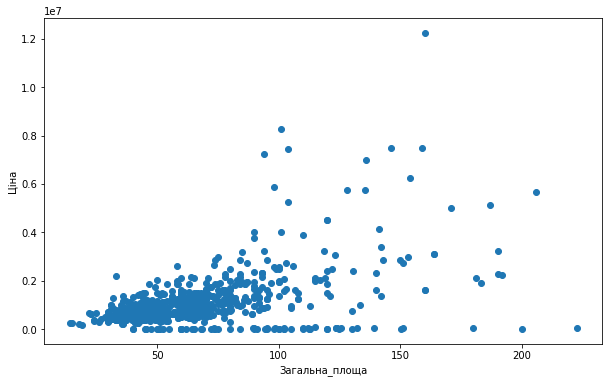

In [138]:
plt.scatter(x = flats["Загальна_площа"], y = flats["Ціна"])
plt.xlabel("Загальна_площа")
plt.ylabel("Ціна")
plt.show()

Як ми бачимо, багато квартир продаються з ціною, близькою до нуля. Можна зробити припущення, що ціна вказана або в долларах, або той, хто вводив ціну забув добавити один чи два нулі до ціни.

In [ ]:
Спробую помножити на 100 всі ціни, які є менші за

In [97]:
flats.sort_values(by="Ціна", ascending=False).head()

,Місто,Кімнат,Загальна_площа,Ціна
459,Київ,5,160.0,12250000.0
411,Київ,2,101.0,8250000.0
464,Київ,4,146.0,7500000.0
461,Київ,2,159.0,7475000.0
410,Київ,3,104.0,7450000.0


Якщо посортувати квартири по ціні за зростанням, то ми бачимо, що є 64 квартири, у яких ціна нижча за 100 тис. грн., при цьому площа значно більша, ніж у квартир, які ідуть далі і коштують у 2-3 рази більше. 

In [136]:
flats.sort_values(by="Ціна", ascending=True).iloc[0:70]

,Місто,Кімнат,Загальна_площа,Ціна
660,Тернопіль,2,68.14,10200.0
659,Тернопіль,2,73.51,10300.0
330,Івано-Франківськ,3,102.00,10500.0
821,Хмельницький,3,112.56,10500.0
665,Тернопіль,2,62.00,10750.0
360,Києво-Святошинський,2,50.00,10902.0
509,Київ,3,84.00,11000.0
355,Києво-Святошинський,2,51.00,11200.0
36,Вінниця,1,45.50,11500.0
485,Київ,2,60.00,11700.0


In [122]:
flats[(flats["Ціна"]<=1e+5)].shape[0]

64

Створю копію поточного датасету та домножу всі ціни, які <=1e+5 на 100 і виведу на графік:

In [137]:
flats_fix1 = flats.copy()

In [139]:
flats_fix1.loc[(flats_fix1["Ціна"]<=1e+5), "Ціна"] = flats_fix1.loc[(flats_fix1["Ціна"]<=1e+5), "Ціна"]*100  

In [140]:
# flats_fix1.replace({"Ціна":flats_fix1[(flats_fix1["Ціна"]<=1e+5)]["Ціна"]*100})

In [141]:
flats_fix1[(flats_fix1["Ціна"]<=1e+5)].shape[0]

0

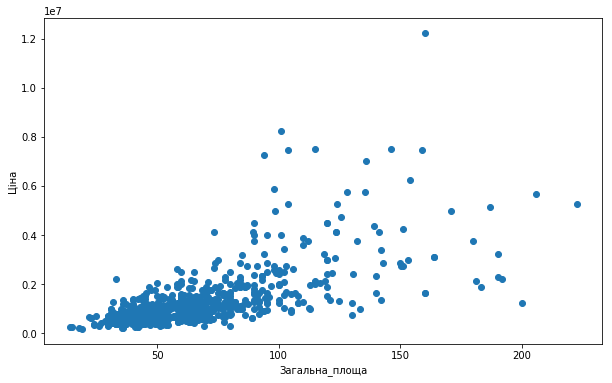

In [142]:
plt.scatter(x = flats_fix1["Загальна_площа"], y = flats_fix1["Ціна"])
plt.xlabel("Загальна_площа")
plt.ylabel("Ціна")
plt.show()

Тепер все стало виглядати значно краще. Є ще 1 квартира, у якої ціна > 1e+7, але припустимо що у цієї людини дуже крута квартира з шикарним ремонтом, тому така ціна.

In [145]:
flats_fix1[(flats_fix1["Ціна"]>=1e+7)]

,Місто,Кімнат,Загальна_площа,Ціна
459,Київ,5,160.0,12250000.0
